In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# sns.set(font_scale=1.2);

# Prep
## Load

In [2]:
df = pd.read_csv('../_input/islr/Credit.csv', index_col=False)
df = df.iloc[:,1:]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Preview

In [3]:
df.keys()

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [4]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']
num.remove('Balance')
target = 'Balance' # Target. What we want to predict

In [5]:
num

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [6]:
cat

['Gender', 'Student', 'Married', 'Ethnicity']

In [7]:
target

'Balance'

## Target
We want to understand the Balance

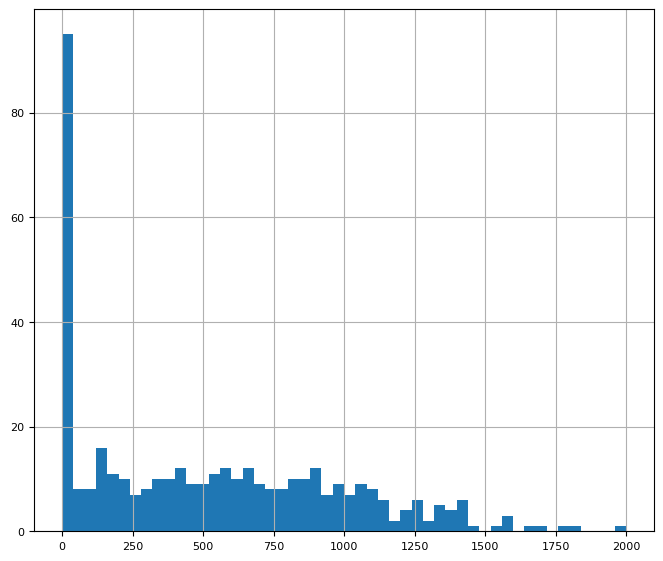

In [8]:
df[target].hist(bins=50);

In [9]:
df[target].isnull().sum()

0

In [10]:
df[target].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

## Create Test Set

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Explore
## Correlation

In [43]:
# import pandas as pd
# import numpy as np
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
# from scipy import stats
import statsmodels.formula.api as sm
est = sm.ols(formula='Balance ~ Income + Limit + Rating + Cards + Age + Student', data=df)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          1.58e-260
Time:                        04:32:07   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -493.7342     24.825    -19.

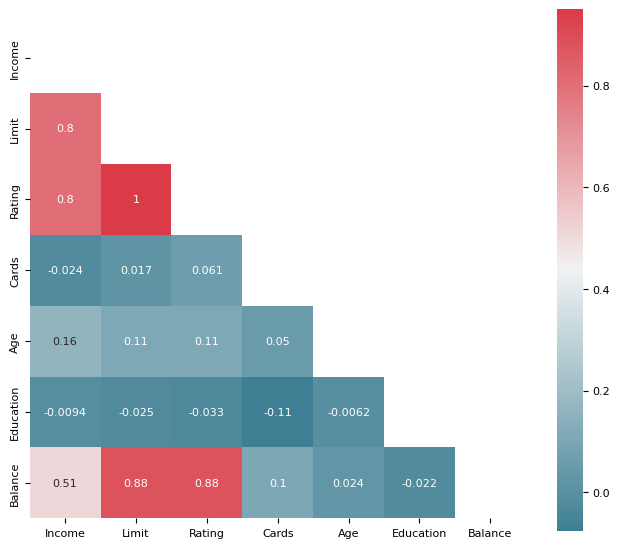

In [16]:
corr = train.corr()
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True
            , square=True
            , mask=mask
            , cmap=sns.diverging_palette(220, 10, as_cmap=True), robust=True);

## 3 Graphs

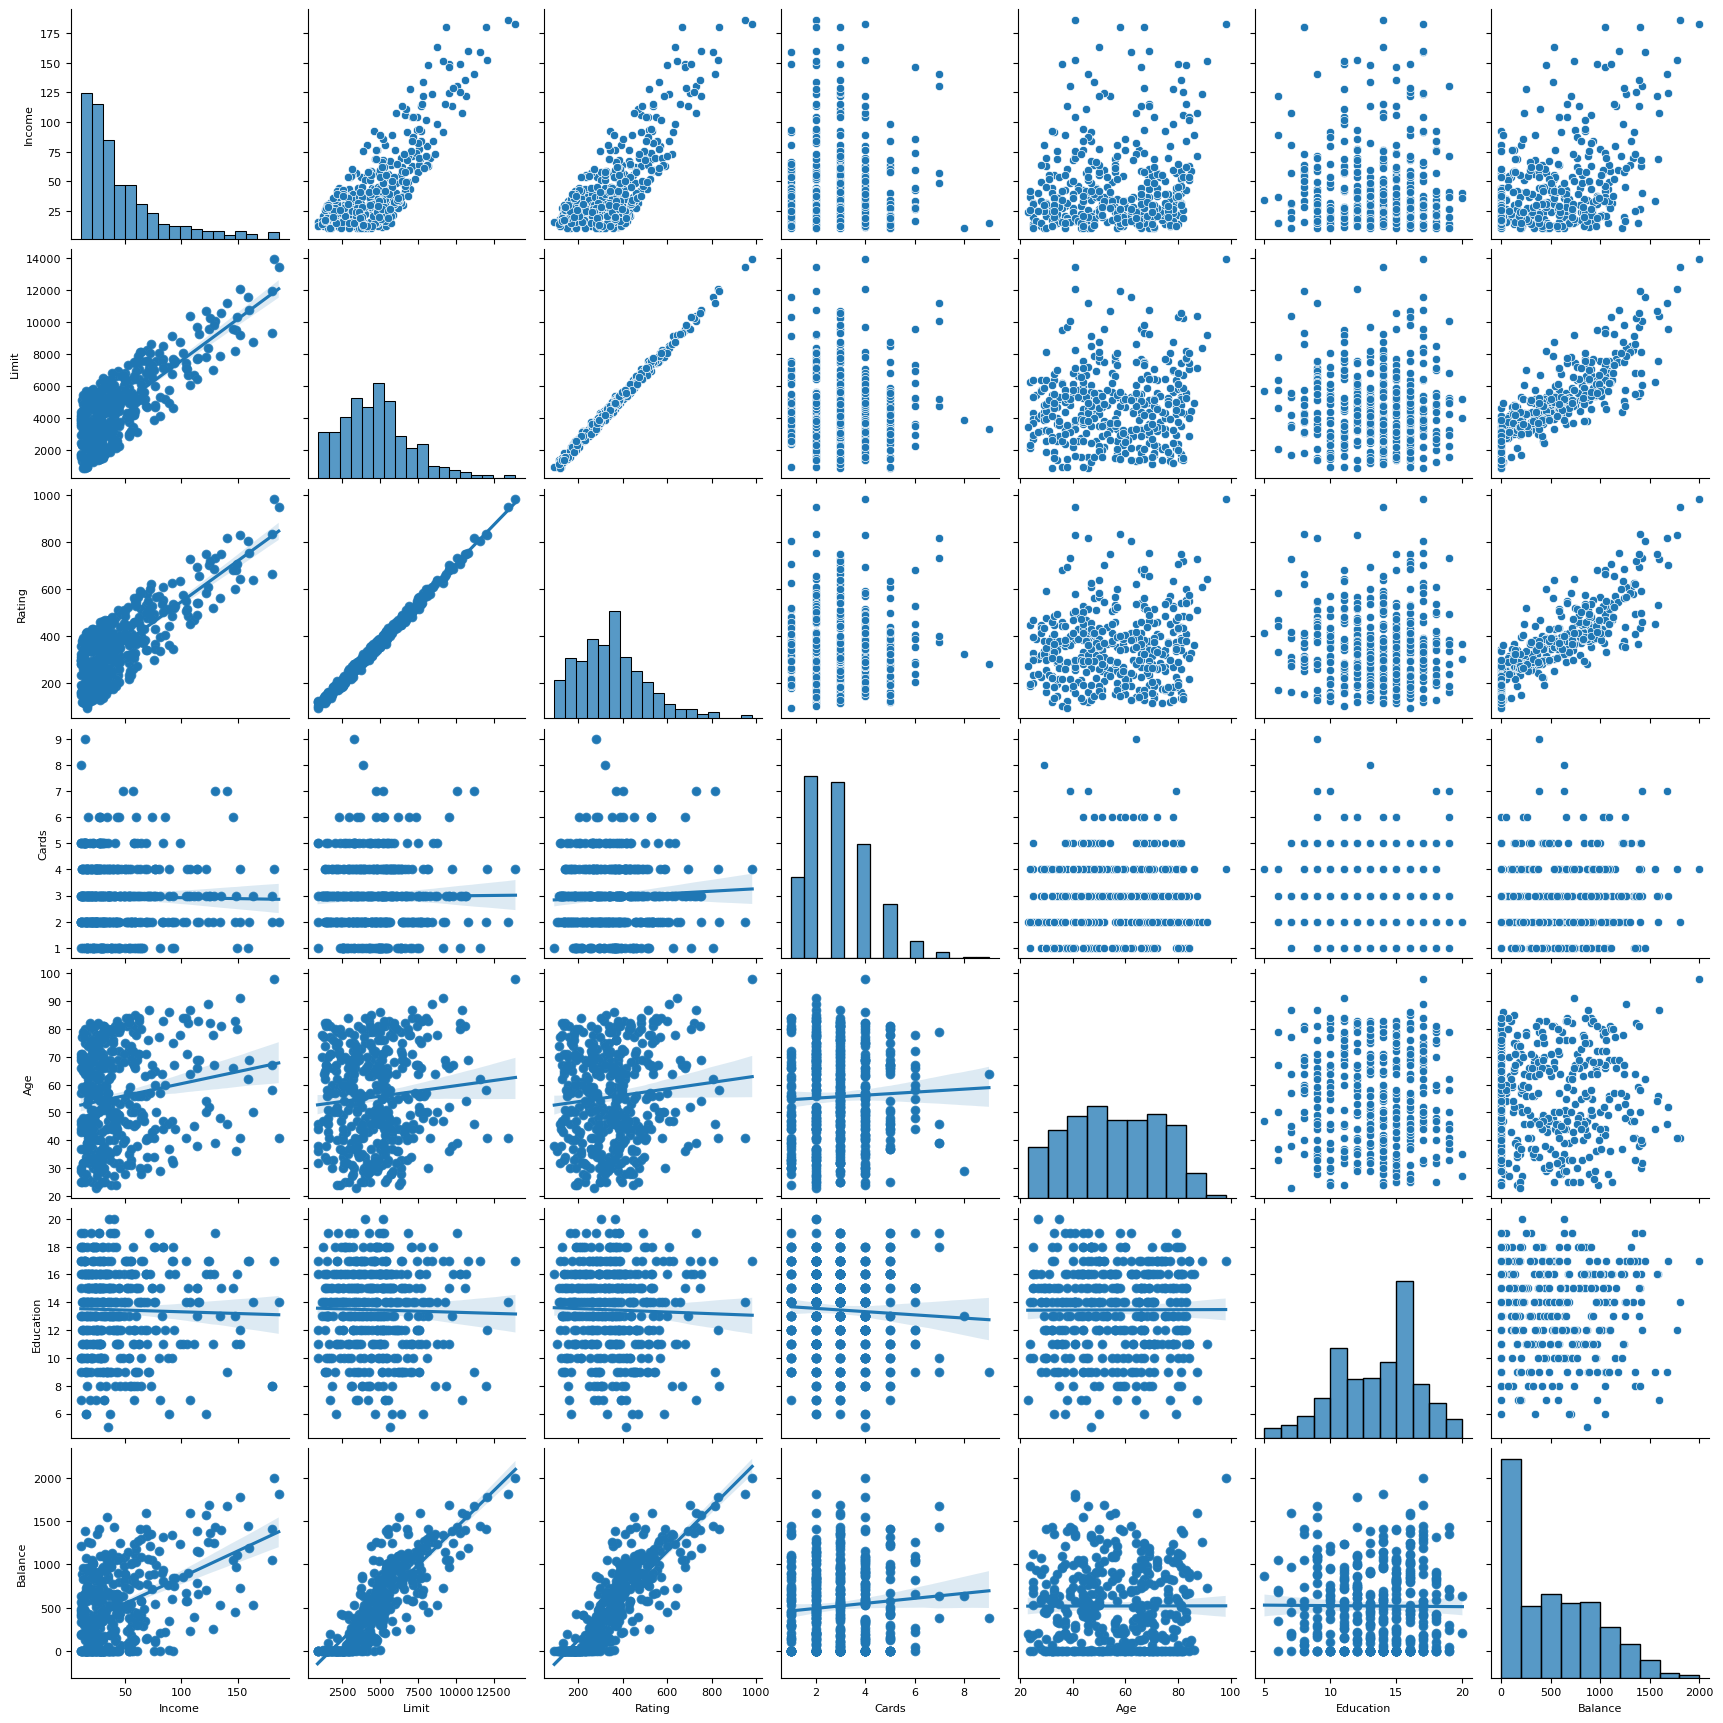

In [34]:
g = sns.pairplot(df)
g.map_lower(sns.regplot);

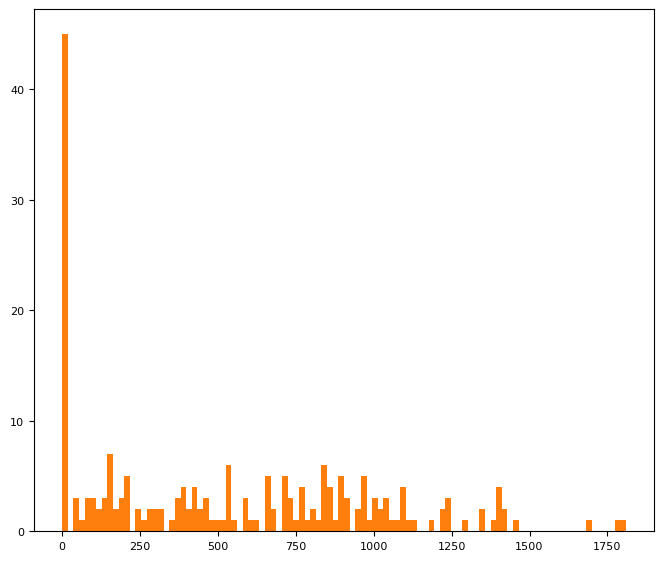

In [18]:
plt.hist('Balance', bins=100, data=df.query('Gender=="Male"'));
plt.hist('Balance', bins=100, data=df.query('Gender=="Female"'));

In [19]:
male = df.query('Gender=="Male"')['Balance']
female = df.query('Gender=="Female"')['Balance']

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
enc = OneHotEncoder()

In [22]:
enc.fit(df[['Gender']])

OneHotEncoder()

In [23]:
enc.transform(df[['Gender']]).toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [24]:
df['sex'] = np.where('')

ValueError: Length of values (1) does not match length of index (400)

In [ ]:
b0 = male.mean()

In [ ]:
b1 = female.mean()

In [ ]:
import numpy as np
np.sqrt(sum((male.mean() - female)**2))